# Base model for stock prediction

In [1]:
from tools.log_controller import LogController
from pathlib import Path

log_controller = LogController(config_path=Path('config', 'logging_config.json'))
log_controller.start()

 2025-10-25 16:15:10 - data_repository - INFO - Loaded: AAPL
 2025-10-25 16:15:10 - data_repository - INFO - Loaded: AMZN_enhanced
 2025-10-25 16:15:10 - data_repository - INFO - Loaded: IBM
 2025-10-25 16:15:10 - data_repository - INFO - Loaded: AMZN_enhanced
 2025-10-25 16:15:10 - data_repository - INFO - Loaded: IBM
 2025-10-25 16:15:10 - data_repository - INFO - Loaded: AMZN
 2025-10-25 16:15:10 - data_repository - INFO - Loaded periodic stock market data for: {'IBM', 'AMZN', 'AAPL', 'AMZN_enhanced'}
 2025-10-25 16:15:10 - data_repository - INFO - Loaded: AMZN
 2025-10-25 16:15:10 - data_repository - INFO - Loaded periodic stock market data for: {'IBM', 'AMZN', 'AAPL', 'AMZN_enhanced'}


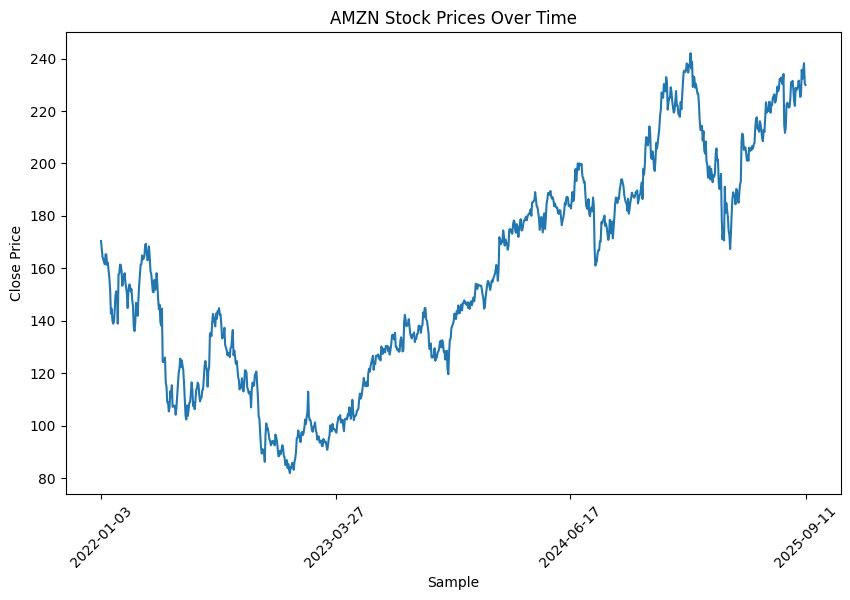

In [2]:
from core.data_repository import DataRepository
from pathlib import Path
from tools.data_visualizer import plot_stock_prices

data_repository = DataRepository(repo_path=Path('repo'))
AMZN_periodic_data = data_repository.get_dataframes()['AMZN']

plot_stock_prices(AMZN_periodic_data, column='Close', title='AMZN Stock Prices Over Time')

In [3]:
from core.data_preparator import DataPreparator

timesteps_lookback = 3

AMZN_supervised_data = DataPreparator.reformat_periodic_to_supervised_data(
    dataframe=AMZN_periodic_data,
    target_column='Close',
    t=timesteps_lookback
)

AMZN_supervised_data

 2025-10-25 16:15:11 - data_preparator - INFO - Preparing data for target column: Close, with t=3


,Close,Close_0,Close_1,Close_2
Date,,,,
2022-01-06,163.253998,164.356995,167.522003,170.404495
2022-01-07,162.554001,163.253998,164.356995,167.522003
2022-01-10,161.485992,162.554001,163.253998,164.356995
2022-01-11,165.362000,161.485992,162.554001,163.253998
2022-01-12,165.207001,165.362000,161.485992,162.554001
...,...,...,...,...
2025-09-05,232.330002,235.679993,225.990005,225.339996
2025-09-08,235.839996,232.330002,235.679993,225.990005
2025-09-09,238.240005,235.839996,232.330002,235.679993


In [4]:
from core.dataset import StockDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

AMZN_train_dataset, AMZN_test_dataset = train_test_split(AMZN_supervised_data, test_size=.1, shuffle=False, random_state=42)
AMZN_train_dataset, AMZN_validation_dataset = train_test_split(AMZN_train_dataset, test_size=.2, shuffle=False, random_state=42)

In [5]:
target = 'Close'
features = [col for col in AMZN_supervised_data.columns if col != target]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

scaler_X.fit(AMZN_train_dataset[features])
scaler_y.fit(AMZN_train_dataset[[target]])

X_train_scaled = scaler_X.transform(AMZN_train_dataset[features])
y_train_scaled = scaler_y.transform(AMZN_train_dataset[[target]])

X_validation_scaled = scaler_X.transform(AMZN_validation_dataset[features])
y_validation_scaled = scaler_y.transform(AMZN_validation_dataset[[target]])

X_test_scaled = scaler_X.transform(AMZN_test_dataset[features])
y_test_scaled = scaler_y.transform(AMZN_test_dataset[[target]])

AMZN_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
AMZN_train_scaled[target] = y_train_scaled

AMZN_validation_scaled = pd.DataFrame(X_validation_scaled, columns=features)
AMZN_validation_scaled[target] = y_validation_scaled

AMZN_test_scaled = pd.DataFrame(X_test_scaled, columns=features)
AMZN_test_scaled[target] = y_test_scaled

AMZN_train_dataset = AMZN_train_scaled
AMZN_validation_dataset = AMZN_validation_scaled
AMZN_test_dataset = AMZN_test_scaled

In [6]:
display(AMZN_train_dataset.shape, AMZN_validation_dataset.shape, AMZN_test_dataset.shape)
display(AMZN_train_dataset.head(), AMZN_validation_dataset.head(), AMZN_test_dataset.head())

(664, 4)

(166, 4)

(93, 4)

,Close_0,Close_1,Close_2,Close
0,0.698401,0.725182,0.749573,0.689068
1,0.689068,0.698401,0.725182,0.683144
2,0.683144,0.689068,0.698401,0.674107
3,0.674107,0.683144,0.689068,0.706905
4,0.706905,0.674107,0.683144,0.705593


,Close_0,Close_1,Close_2,Close
0,0.752919,0.772550,0.792689,0.764089
1,0.764089,0.752919,0.772550,0.818074
2,0.818074,0.764089,0.752919,0.799035
3,0.799035,0.818074,0.764089,0.774327
4,0.774327,0.799035,0.818074,0.812913


,Close_0,Close_1,Close_2,Close
0,0.893298,0.895921,0.906837,0.868167
1,0.868167,0.893298,0.895921,0.917076
2,0.917076,0.868167,0.893298,0.915214
3,0.915214,0.917076,0.868167,0.884498
4,0.884498,0.915214,0.917076,0.873160


In [7]:
AMZN_train_dataset = StockDataset(AMZN_train_dataset)
AMZN_validation_dataset = StockDataset(AMZN_validation_dataset)
AMZN_test_dataset = StockDataset(AMZN_test_dataset)

 2025-10-25 16:15:14 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-25 16:15:14 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-25 16:15:14 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-25 16:15:14 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close
 2025-10-25 16:15:14 - dataset - INFO - Created stock dataset for AMZN, focusing target: Close


In [8]:
# from models.lstm_model import LSTMStockModel

# best_params, best_value = LSTMStockModel.optimize_hyperparameters(
#     train_dataset=AMZN_train_dataset,
#     validation_dataset=AMZN_validation_dataset,
#     feature_number=timesteps_lookback,
#     ticker='AMZN',
#     input_dim=1,
#     output_dim=1,
#     n_trials=20
# )
# print(f'Best hyperparameters: {best_params}, Best MSE Loss: {best_value}')

In [9]:
from models.lstm_model import LSTMStockModel

AMZN_base_model = LSTMStockModel(
    id='base_amzn_model',
    ticker='AMZN',
    input_dim=1,
    hidden_dim=27,
    layer_dim=1,
    output_dim=1
)

 2025-10-25 16:15:14 - model - INFO - Model(id=base_amzn_model,
ticker=('AMZN',),
input_dimension=1),
hidden_dimension=27,
layer_dimension=1,
output_dimension=1)


In [10]:
from torch.optim import Adam
from torch.nn import MSELoss

optimizer = Adam(AMZN_base_model.parameters(), lr=0.001)
loss_function = MSELoss()

In [11]:
from torch.utils.data import DataLoader
import torch
import numpy as np


AMZN_train_data_loader = DataLoader(AMZN_train_dataset, batch_size=16, shuffle=False)
AMZN_validation_data_loader = DataLoader(AMZN_validation_dataset, batch_size=10, shuffle=False)
epochs = 20

train_mse_list, val_mse_list, train_r2_list, val_r2_list, val_actuals, val_predictions, val_errors = AMZN_base_model.perform_training(
    train_loader=AMZN_train_data_loader,
    validation_loader=AMZN_validation_data_loader,
    optimizer=optimizer,
    loss_function=loss_function,
    epochs=epochs,
    feature_number=timesteps_lookback
)

 2025-10-25 16:15:16 - model - INFO - Epoch [1/20]
 2025-10-25 16:15:16 - model - INFO - Train MSE: 0.147596, R2: -1.2468
 2025-10-25 16:15:16 - model - INFO - Validation MSE: 0.514783, R2: -17.9917
 2025-10-25 16:15:16 - model - INFO - Train MSE: 0.147596, R2: -1.2468
 2025-10-25 16:15:16 - model - INFO - Validation MSE: 0.514783, R2: -17.9917
 2025-10-25 16:15:16 - model - INFO - Epoch [2/20]
 2025-10-25 16:15:16 - model - INFO - Train MSE: 0.064430, R2: 0.0192
 2025-10-25 16:15:16 - model - INFO - Validation MSE: 0.265587, R2: -8.7982
 2025-10-25 16:15:16 - model - INFO - Epoch [2/20]
 2025-10-25 16:15:16 - model - INFO - Train MSE: 0.064430, R2: 0.0192
 2025-10-25 16:15:16 - model - INFO - Validation MSE: 0.265587, R2: -8.7982
 2025-10-25 16:15:16 - model - INFO - Epoch [3/20]
 2025-10-25 16:15:16 - model - INFO - Train MSE: 0.066022, R2: -0.0050
 2025-10-25 16:15:16 - model - INFO - Validation MSE: 0.234165, R2: -7.6390
 2025-10-25 16:15:16 - model - INFO - Epoch [3/20]
 2025-10-2

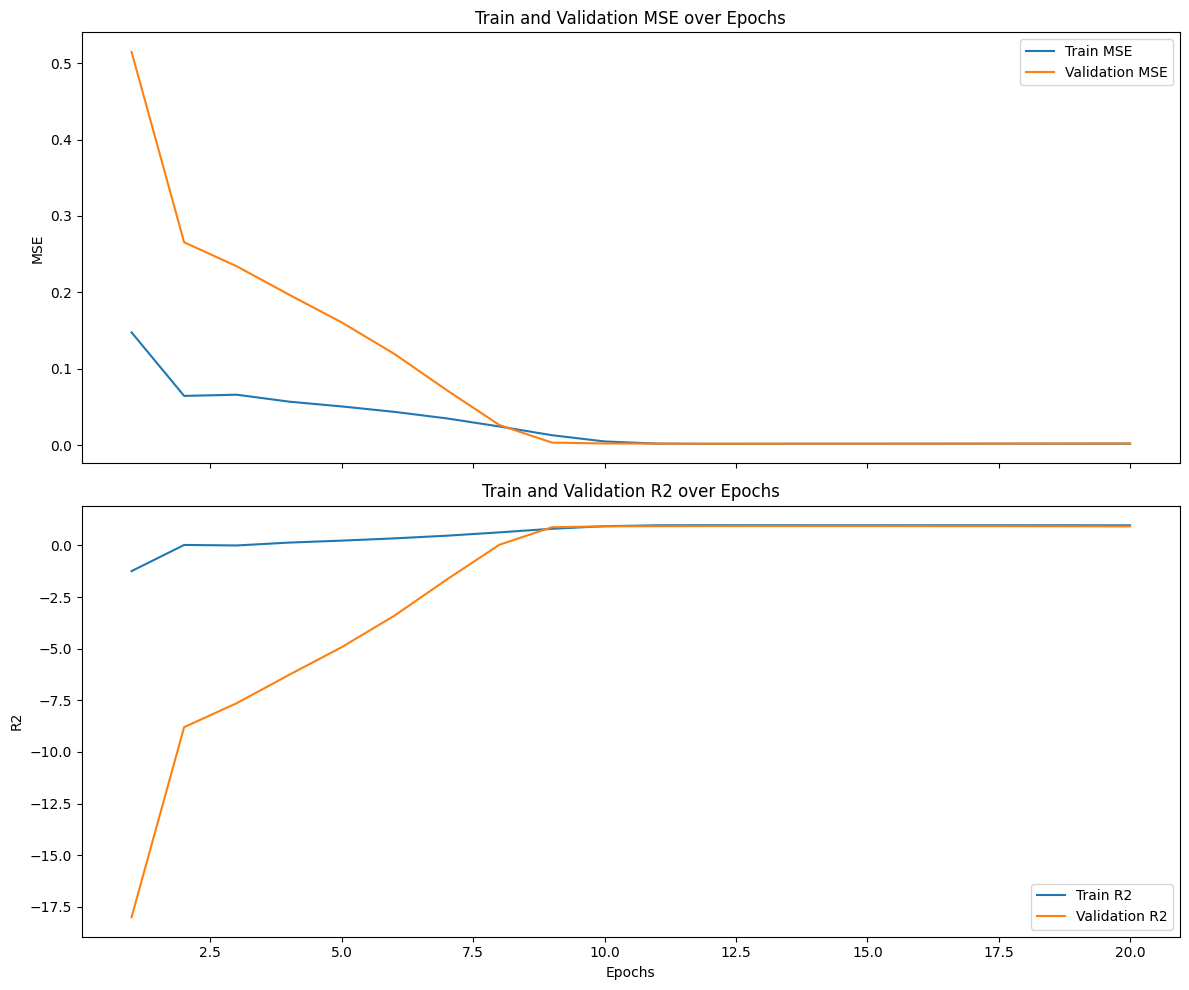

In [12]:
from tools.data_visualizer import plot_performance_metrics

plot_performance_metrics(train_mse_list, val_mse_list, train_r2_list, val_r2_list, epochs)

In [13]:
AMZN_test_data_loader = DataLoader(AMZN_test_dataset, batch_size=10, shuffle=False)

actuals, predictions, errors = AMZN_base_model.evaluate(
    test_loader=AMZN_test_data_loader,
    loss_function=loss_function,
    scaler_y=scaler_y,
    feature_number=timesteps_lookback
)

Test RMSE: 0.0472
Test Loss (RMSE) on original scale: 5.5539


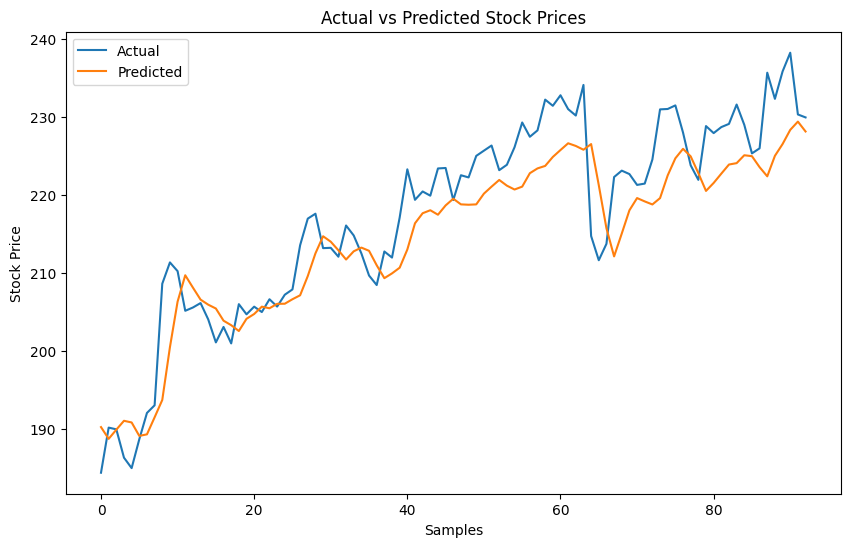

In [14]:
from tools.data_visualizer import plot_predictions

plot_predictions(actuals, predictions)

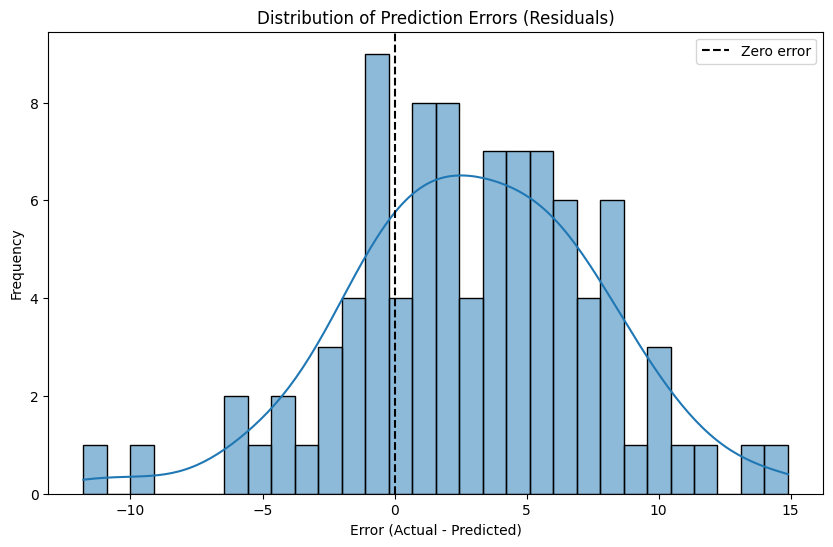

In [15]:
from tools.data_visualizer import plot_errors

plot_errors(errors)